# Low Frequency OOI hydrophone data in zarr file
<img src="https://zarr.dev/android-chrome-512x512.png" width="200"> + <img src="../imgs/ooi_logo.png" width="300">

[Zarr](https://zarr.dev/) is a cloud optimized data format that allows for exploration of large dataset.

8 years of ambient sound data measured by the low-frequency (fs=200 Hz) OOI hydrophones has been converted from the original mseed file format into zarr. This greatly increases the efficiency of exploring the hydrophone data.

In [1]:
import ooi_2025_summer_school_acoustics as oa
import pandas as pd
import xarray as xr
from dask.distributed import Client
import xrsignal as xrs
from scipy import signal
import hvplot.xarray
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 24,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46025,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:39645,Total threads: 4
Dashboard: http://127.0.0.1:44533/status,Memory: 10.67 GiB
Nanny: tcp://127.0.0.1:43133,


In [3]:
fn = '/home/jovyan/ooi/rsn_cabled/SummerSchool2025/lowfrequency_hydrophone_data/ooi_lfhydrophones.zarr'
lf_hydrophones = xr.open_zarr(fn)

## Calculating large spectrogram

In [4]:
start_time = pd.Timestamp('2018-01-01')
end_time = pd.Timestamp('2018-02-01')

data_slice = oa.slice_lf_hydrophones(lf_hydrophones, start_time, end_time, include_coord=False)

In [11]:
data_slice

<xarray.Dataset> Size: 21GB
Dimensions:  (time: 535680000)
Dimensions without coordinates: time
Data variables:
    AXBA1    (time) float64 4GB dask.array<chunksize=(720000,), meta=np.ndarray>
    AXCC1    (time) float64 4GB dask.array<chunksize=(720000,), meta=np.ndarray>
    AXEC2    (time) float64 4GB dask.array<chunksize=(720000,), meta=np.ndarray>
    HYS14    (time) float64 4GB dask.array<chunksize=(720000,), meta=np.ndarray>
    HYSB1    (time) float64 4GB dask.array<chunksize=(720000,), meta=np.ndarray>
Attributes:
    channel:        HDH
    delta:          0.005
    network:        OO
    sampling_rate:  200
    units:          Pa

In [9]:
spec = xrs.welch(data_slice['AXCC1'], dim='time', dB=True, fs=200)

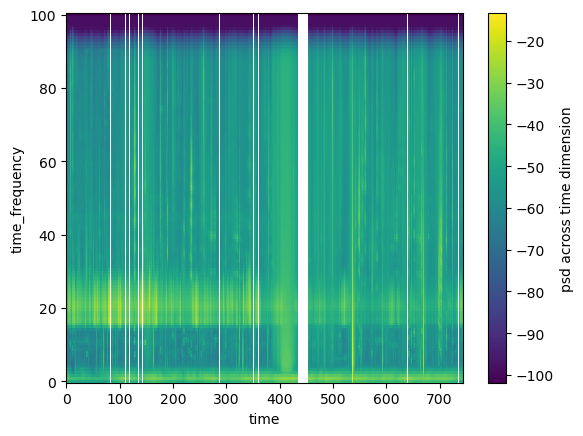

In [10]:
spec.plot()

## smaller chunks of data

In [4]:
start_time = pd.Timestamp('2018-01-01')
end_time = pd.Timestamp('2018-01-01 T01:00:00')

data_slice = oa.slice_lf_hydrophones(lf_hydrophones, start_time, end_time)

In [5]:
psd = xrs.welch(data_slice, dim='time', dB=True, nperseg=2048, fs=200)

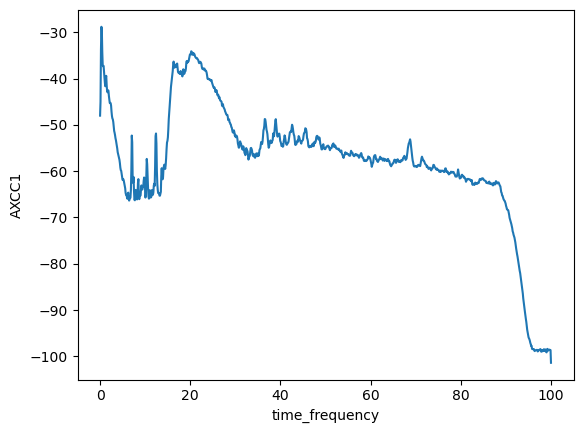

In [30]:
psd['AXCC1'].plot()

In [41]:
f,t,Sxx_np = signal.stft(data_slice['AXCC1'].values, fs=200)

Sxx = xr.DataArray(Sxx_np, dims=['frequency','time'], coords={'frequency':f, 'time':t})

<>:1: SyntaxWarning: invalid escape sequence '\ '
<>:1: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_4830/3670099112.py:1: SyntaxWarning: invalid escape sequence '\ '
  (20*np.log10(np.abs(Sxx)*1e6)).plot(vmin=50, vmax=100, cbar_kwargs = {'label':'dB rel $\\mu \\mathrm{Pa}^2 \ / \ \\mathrm{Hz}$'})


(500.0, 1000.0)

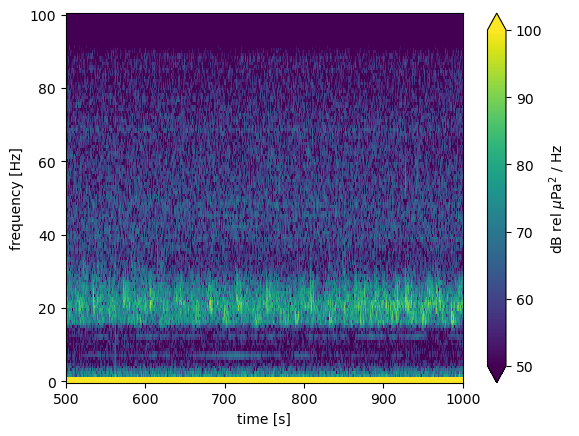

In [75]:
(20*np.log10(np.abs(Sxx)*1e6)).plot(vmin=50, vmax=100, cbar_kwargs = {'label':'dB rel $\\mu \\mathrm{Pa}^2 \ / \ \\mathrm{Hz}$'})
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')

plt.xlim([500,1000])